Contains some supporting functions and move definitions

In [13]:
moves = ["R","R'","R2","L","L'","L2","U","U'","U2","D","D'","D2","F","F'","F2","B","B'","B2"]

move_scores = {
    "R": 1,
    "R'": 1,
    "R2": 2,
    "L": 2,
    "L'": 2,
    "L2": 3,
    "U": 1,
    "U'": 1,
    "U2": 2,
    "D": 2,
    "D'": 2,
    "D2": 4,
    "F": 2,
    "F'": 2,
    "F2": 3,
    "B": 4,
    "B'": 4,
    "B2": 6
}

# alg scorer
def score_alg(alg):
    score = 0
    list_moves = alg.split(" ")
    for move in list_moves:
        if move in move_scores:
            score += move_scores[move]
    return score

# alg ranker
def alg_ranker(algs,N,prnt=True):
    '''
    algs: list of algs
    N: number of algs we will display
    '''
    if N == 0: 
        N = len(algs)
    N = min(len(algs),N)
    scores = {}
    for alg in algs:
        scores[alg] = score_alg(alg,move_scores)
    
    best_N = sorted(scores.items(), key=lambda x:x[1])[:N]
    
    if prnt:
        for i,alg in enumerate(best_N):
            print(f"{i+1}. {alg[0]}")
    
    return best_N

def rank_algs_from_file(file_name,exclude_U_before):
    '''
    file_name: name of the file with your algs
    exclude_U_before: if True it excludes all algs that start with U*, if False it excludes all algs that ends with U*
    '''
    with open(file_name) as my_file:
        read_algs = my_file.read().split('\n')
        algs = []
        for alg in read_algs:
            if exclude_U_before:
                if "'" in alg and alg[0] != "U": 
                    algs += [alg]
            else:
                if "'" in alg and (alg[-1] != "U" or alg[-2] != "U"): 
                    algs += [alg]
    alg_ranker(algs,50)

In [2]:
@njit
def _inc(ids):
    for i in range(len(ids)):
        ids[i]+=1
        ids[i]%=18
        if ids[i]:
            break
    return ids

@njit
def _is_valid(length,ids):
    for i in range(length-1):
        if ids[i]//3==ids[i+1]//3:
            return False
        if ids[i]//6==ids[i+1]//6 and (ids[i]//3)%2:
            return False
    return True      

@njit
def _increment(length,ids):
    ids = _inc(ids)
    while not _is_valid(length,ids):
        ids = _inc(ids)
    return ids

length = 4
ids = np.array([0,3,6,0])
_increment(length,ids)


NameError: name 'njit' is not defined

In [ ]:
class alg_index:
    def __init__(self, length, moves = ["R","R'","R2","L","L'","L2","U","U'","U2","D","D'","D2","F","F'","F2","B","B'","B2"]):
        '''
        length: int
        '''
        self.length = length
        self.moves = moves
        self.ids = np.array(([0,3,6]*int(length/3+1))[:length])
        
    def is_valid(self):
        return _is_valid(self.length,self.ids)
        
    def inc(self):
        ids = _inc(ids)
    
    def increment(self):
        self.ids = _increment(self.length,self.ids)
        
    def get_alg(self):
        scr = self.moves[self.ids[0]]
        for i in range(1,len(self.ids)):
            scr += f" {self.moves[self.ids[i]]}"
        return scr

In [4]:
# def moves

move_dict = {
    "R": np.array([ 0,  1, 47,  3,  4, 50,  6,  7, 53, 15, 12,  9, 16, 13, 10, 17, 14,
       11, 44, 19, 20, 41, 22, 23, 38, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37,  2, 39, 40,  5, 42, 43,  8, 45, 46, 24, 48, 49, 21,
       51, 52, 18]),
    "R'": np.array([ 0,  1, 38,  3,  4, 41,  6,  7, 44, 11, 14, 17, 10, 13, 16,  9, 12,
       15, 53, 19, 20, 50, 22, 23, 47, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 24, 39, 40, 21, 42, 43, 18, 45, 46,  2, 48, 49,  5,
       51, 52,  8]),
    "R2": np.array([ 0,  1, 24,  3,  4, 21,  6,  7, 18, 17, 16, 15, 14, 13, 12, 11, 10,
        9,  8, 19, 20,  5, 22, 23,  2, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 47, 39, 40, 50, 42, 43, 53, 45, 46, 38, 48, 49, 41,
       51, 52, 44]),
    "L": np.array([36,  1,  2, 39,  4,  5, 42,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 51, 21, 22, 48, 24, 25, 45, 33, 30, 27, 34, 31, 28, 35,
       32, 29, 26, 37, 38, 23, 40, 41, 20, 43, 44,  0, 46, 47,  3, 49, 50,
        6, 52, 53]),
    "L'": np.array([ 45,  1,  2, 48,  4,  5, 51,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 42, 21, 22, 39, 24, 25, 36, 29, 32, 35, 28, 31, 34, 27,
       30, 33,  0, 37, 38,  3, 40, 41,  6, 43, 44, 26, 46, 47, 23, 49, 50,
       20, 52, 53]),
    "L2": np.array([26,  1,  2, 23,  4,  5, 20,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19,  6, 21, 22,  3, 24, 25,  0, 35, 34, 33, 32, 31, 30, 29,
       28, 27, 45, 37, 38, 48, 40, 41, 51, 43, 44, 36, 46, 47, 39, 49, 50,
       42, 52, 53]),
    "U": np.array([ 9, 10, 11,  3,  4,  5,  6,  7,  8, 18, 19, 20, 12, 13, 14, 15, 16,
       17, 27, 28, 29, 21, 22, 23, 24, 25, 26,  0,  1,  2, 30, 31, 32, 33,
       34, 35, 42, 39, 36, 43, 40, 37, 44, 41, 38, 45, 46, 47, 48, 49, 50,
       51, 52, 53]),
    "U'": np.array([27, 28, 29,  3,  4,  5,  6,  7,  8,  0,  1,  2, 12, 13, 14, 15, 16,
       17,  9, 10, 11, 21, 22, 23, 24, 25, 26, 18, 19, 20, 30, 31, 32, 33,
       34, 35, 38, 41, 44, 37, 40, 43, 36, 39, 42, 45, 46, 47, 48, 49, 50,
       51, 52, 53]),
    "U2": np.array([18, 19, 20,  3,  4,  5,  6,  7,  8, 27, 28, 29, 12, 13, 14, 15, 16,
       17,  0,  1,  2, 21, 22, 23, 24, 25, 26,  9, 10, 11, 30, 31, 32, 33,
       34, 35, 44, 43, 42, 41, 40, 39, 38, 37, 36, 45, 46, 47, 48, 49, 50,
       51, 52, 53]),
    "D": np.array([ 0,  1,  2,  3,  4,  5, 33, 34, 35,  9, 10, 11, 12, 13, 14,  6,  7,
        8, 18, 19, 20, 21, 22, 23, 15, 16, 17, 27, 28, 29, 30, 31, 32, 24,
       25, 26, 36, 37, 38, 39, 40, 41, 42, 43, 44, 51, 48, 45, 52, 49, 46,
       53, 50, 47]),
    "D'": np.array([ 0,  1,  2,  3,  4,  5, 15, 16, 17,  9, 10, 11, 12, 13, 14, 24, 25,
       26, 18, 19, 20, 21, 22, 23, 33, 34, 35, 27, 28, 29, 30, 31, 32,  6,
        7,  8, 36, 37, 38, 39, 40, 41, 42, 43, 44, 47, 50, 53, 46, 49, 52,
       45, 48, 51]),
    "D2": np.array([ 0,  1,  2,  3,  4,  5, 24, 25, 26,  9, 10, 11, 12, 13, 14, 33, 34,
       35, 18, 19, 20, 21, 22, 23,  6,  7,  8, 27, 28, 29, 30, 31, 32, 15,
       16, 17, 36, 37, 38, 39, 40, 41, 42, 43, 44, 53, 52, 51, 50, 49, 48,
       47, 46, 45]),
    "F": np.array([ 6,  3,  0,  7,  4,  1,  8,  5,  2, 42, 10, 11, 43, 13, 14, 44, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 45, 30, 31, 46, 33,
       34, 47, 36, 37, 38, 39, 40, 41, 35, 32, 29, 15, 12,  9, 48, 49, 50,
       51, 52, 53]),
    "F'": np.array([ 2,  5,  8,  1,  4,  7,  0,  3,  6, 47, 10, 11, 46, 13, 14, 45, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 44, 30, 31, 43, 33,
       34, 42, 36, 37, 38, 39, 40, 41,  9, 12, 15, 29, 32, 35, 48, 49, 50,
       51, 52, 53]),
    "F2": np.array([ 8,  7,  6,  5,  4,  3,  2,  1,  0, 35, 10, 11, 32, 13, 14, 29, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 15, 30, 31, 12, 33,
       34,  9, 36, 37, 38, 39, 40, 41, 47, 46, 45, 44, 43, 42, 48, 49, 50,
       51, 52, 53]),
    "B": np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 53, 12, 13, 52, 15, 16,
       51, 24, 21, 18, 25, 22, 19, 26, 23, 20, 38, 28, 29, 37, 31, 32, 36,
       34, 35, 11, 14, 17, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       27, 30, 33]),
    "B'": np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 36, 12, 13, 37, 15, 16,
       38, 20, 23, 26, 19, 22, 25, 18, 21, 24, 51, 28, 29, 52, 31, 32, 53,
       34, 35, 33, 30, 27, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       17, 14, 11]),
    "B2": np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 33, 12, 13, 30, 15, 16,
       27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 28, 29, 14, 31, 32, 11,
       34, 35, 53, 52, 51, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       38, 37, 36]),
    "x": np.array([45, 46, 47, 48, 49, 50, 51, 52, 53, 15, 12,  9, 16, 13, 10, 17, 14,
       11, 44, 43, 42, 41, 40, 39, 38, 37, 36, 29, 32, 35, 28, 31, 34, 27,
       30, 33,  0,  1,  2,  3,  4,  5,  6,  7,  8, 26, 25, 24, 23, 22, 21,
       20, 19, 18]),
    "x'": np.array([36, 37, 38, 39, 40, 41, 42, 43, 44, 11, 14, 17, 10, 13, 16,  9, 12,
       15, 53, 52, 51, 50, 49, 48, 47, 46, 45, 33, 30, 27, 34, 31, 28, 35,
       32, 29, 26, 25, 24, 23, 22, 21, 20, 19, 18,  0,  1,  2,  3,  4,  5,
        6,  7,  8]),
    "x2": np.array([26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,
        9,  8,  7,  6,  5,  4,  3,  2,  1,  0, 35, 34, 33, 32, 31, 30, 29,
       28, 27, 45, 46, 47, 48, 49, 50, 51, 52, 53, 36, 37, 38, 39, 40, 41,
       42, 43, 44]),
    "y": np.array([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
       26, 27, 28, 29, 30, 31, 32, 33, 34, 35,  0,  1,  2,  3,  4,  5,  6,
        7,  8, 42, 39, 36, 43, 40, 37, 44, 41, 38, 47, 50, 53, 46, 49, 52,
       45, 48, 51]),
    "y'": np.array([27, 28, 29, 30, 31, 32, 33, 34, 35,  0,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
       25, 26, 38, 41, 44, 37, 40, 43, 36, 39, 42, 51, 48, 45, 52, 49, 46,
       53, 50, 47]),
    "y2": np.array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 44, 43, 42, 41, 40, 39, 38, 37, 36, 53, 52, 51, 50, 49, 48,
       47, 46, 45]),
    "z": np.array([ 6,  3,  0,  7,  4,  1,  8,  5,  2, 42, 39, 36, 43, 40, 37, 44, 41,
       38, 20, 23, 26, 19, 22, 25, 18, 21, 24, 51, 48, 45, 52, 49, 46, 53,
       50, 47, 33, 30, 27, 34, 31, 28, 35, 32, 29, 15, 12,  9, 16, 13, 10,
       17, 14, 11]),
    "z'": np.array([ 2,  5,  8,  1,  4,  7,  0,  3,  6, 47, 50, 53, 46, 49, 52, 45, 48,
       51, 24, 21, 18, 25, 22, 19, 26, 23, 20, 38, 41, 44, 37, 40, 43, 36,
       39, 42, 11, 14, 17, 10, 13, 16,  9, 12, 15, 29, 32, 35, 28, 31, 34,
       27, 30, 33]),
    "z2": np.array([ 8,  7,  6,  5,  4,  3,  2,  1,  0, 35, 34, 33, 32, 31, 30, 29, 28,
       27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11,
       10,  9, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39,
       38, 37, 36]),
    "M": np.array([ 0, 37,  2,  3, 40,  5,  6, 43,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 52, 20, 21, 49, 23, 24, 46, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 25, 38, 39, 22, 41, 42, 19, 44, 45,  1, 47, 48,  4, 50,
       51,  7, 53]),
    "M'": np.array([ 0, 46,  2,  3, 49,  5,  6, 52,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 43, 20, 21, 40, 23, 24, 37, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36,  1, 38, 39,  4, 41, 42,  7, 44, 45, 25, 47, 48, 22, 50,
       51, 19, 53]),
    "M2": np.array([ 0, 25,  2,  3, 22,  5,  6, 19,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18,  7, 20, 21,  4, 23, 24,  1, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 46, 38, 39, 49, 41, 42, 52, 44, 45, 37, 47, 48, 40, 50,
       51, 43, 53]),
    "S": np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 39, 11, 12, 40, 14, 15, 41,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 48, 29, 30, 49, 32, 33,
       50, 35, 36, 37, 38, 34, 31, 28, 42, 43, 44, 45, 46, 47, 16, 13, 10,
       51, 52, 53]),
    "S'": np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 50, 11, 12, 49, 14, 15, 48,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 41, 29, 30, 40, 32, 33,
       39, 35, 36, 37, 38, 10, 13, 16, 42, 43, 44, 45, 46, 47, 28, 31, 34,
       51, 52, 53]),
    "S2": np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 34, 11, 12, 31, 14, 15, 28,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 16, 29, 30, 13, 32, 33,
       10, 35, 36, 37, 38, 50, 49, 48, 42, 43, 44, 45, 46, 47, 41, 40, 39,
       51, 52, 53]),
    "E": np.array([ 0,  1,  2, 30, 31, 32,  6,  7,  8,  9, 10, 11,  3,  4,  5, 15, 16,
       17, 18, 19, 20, 12, 13, 14, 24, 25, 26, 27, 28, 29, 21, 22, 23, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53]),
    "E'": np.array([ 0,  1,  2, 12, 13, 14,  6,  7,  8,  9, 10, 11, 21, 22, 23, 15, 16,
       17, 18, 19, 20, 30, 31, 32, 24, 25, 26, 27, 28, 29,  3,  4,  5, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53]),
    "E2": np.array([ 0,  1,  2, 21, 22, 23,  6,  7,  8,  9, 10, 11, 30, 31, 32, 15, 16,
       17, 18, 19, 20,  3,  4,  5, 24, 25, 26, 27, 28, 29, 12, 13, 14, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53]),
    "r": np.array([ 0, 46, 47,  3, 49, 50,  6, 52, 53, 15, 12,  9, 16, 13, 10, 17, 14,
       11, 44, 43, 20, 41, 40, 23, 38, 37, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36,  1,  2, 39,  4,  5, 42,  7,  8, 45, 25, 24, 48, 22, 21,
       51, 19, 18]),
    "r'": np.array([ 0, 37, 38,  3, 40, 41,  6, 43, 44, 11, 14, 17, 10, 13, 16,  9, 12,
       15, 53, 52, 20, 50, 49, 23, 47, 46, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 25, 24, 39, 22, 21, 42, 19, 18, 45,  1,  2, 48,  4,  5,
       51,  7,  8]),
    "r2": np.array([ 0, 25, 24,  3, 22, 21,  6, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,
        9,  8,  7, 20,  5,  4, 23,  2,  1, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 46, 47, 39, 49, 50, 42, 52, 53, 45, 37, 38, 48, 40, 41,
       51, 43, 44]),
    "l": np.array([36, 37,  2, 39, 40,  5, 42, 43,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 52, 51, 21, 49, 48, 24, 46, 45, 33, 30, 27, 34, 31, 28, 35,
       32, 29, 26, 25, 38, 23, 22, 41, 20, 19, 44,  0,  1, 47,  3,  4, 50,
        6,  7, 53]),
    "l'": np.array([45, 46,  2, 48, 49,  5, 51, 52,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 43, 42, 21, 40, 39, 24, 37, 36, 29, 32, 35, 28, 31, 34, 27,
       30, 33,  0,  1, 38,  3,  4, 41,  6,  7, 44, 26, 25, 47, 23, 22, 50,
       20, 19, 53]),
    "l2": np.array([26, 25,  2, 23, 22,  5, 20, 19,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18,  7,  6, 21,  4,  3, 24,  1,  0, 35, 34, 33, 32, 31, 30, 29,
       28, 27, 45, 46, 38, 48, 49, 41, 51, 52, 44, 36, 37, 47, 39, 40, 50,
       42, 43, 53]),
    "u": np.array([ 9, 10, 11, 12, 13, 14,  6,  7,  8, 18, 19, 20, 21, 22, 23, 15, 16,
       17, 27, 28, 29, 30, 31, 32, 24, 25, 26,  0,  1,  2,  3,  4,  5, 33,
       34, 35, 42, 39, 36, 43, 40, 37, 44, 41, 38, 45, 46, 47, 48, 49, 50,
       51, 52, 53]),
    "u'": np.array([27, 28, 29, 30, 31, 32,  6,  7,  8,  0,  1,  2,  3,  4,  5, 15, 16,
       17,  9, 10, 11, 12, 13, 14, 24, 25, 26, 18, 19, 20, 21, 22, 23, 33,
       34, 35, 38, 41, 44, 37, 40, 43, 36, 39, 42, 45, 46, 47, 48, 49, 50,
       51, 52, 53]),
    "u2": np.array([18, 19, 20, 21, 22, 23,  6,  7,  8, 27, 28, 29, 30, 31, 32, 15, 16,
       17,  0,  1,  2,  3,  4,  5, 24, 25, 26,  9, 10, 11, 12, 13, 14, 33,
       34, 35, 44, 43, 42, 41, 40, 39, 38, 37, 36, 45, 46, 47, 48, 49, 50,
       51, 52, 53]),
    "d": np.array([ 0,  1,  2, 30, 31, 32, 33, 34, 35,  9, 10, 11,  3,  4,  5,  6,  7,
        8, 18, 19, 20, 12, 13, 14, 15, 16, 17, 27, 28, 29, 21, 22, 23, 24,
       25, 26, 36, 37, 38, 39, 40, 41, 42, 43, 44, 51, 48, 45, 52, 49, 46,
       53, 50, 47]),
    "d'": np.array([ 0,  1,  2, 12, 13, 14, 15, 16, 17,  9, 10, 11, 21, 22, 23, 24, 25,
       26, 18, 19, 20, 30, 31, 32, 33, 34, 35, 27, 28, 29,  3,  4,  5,  6,
        7,  8, 36, 37, 38, 39, 40, 41, 42, 43, 44, 47, 50, 53, 46, 49, 52,
       45, 48, 51]),
    "d2": np.array([ 0,  1,  2, 21, 22, 23, 24, 25, 26,  9, 10, 11, 30, 31, 32, 33, 34,
       35, 18, 19, 20,  3,  4,  5,  6,  7,  8, 27, 28, 29, 12, 13, 14, 15,
       16, 17, 36, 37, 38, 39, 40, 41, 42, 43, 44, 53, 52, 51, 50, 49, 48,
       47, 46, 45]),
    "f": np.array([ 6,  3,  0,  7,  4,  1,  8,  5,  2, 42, 39, 11, 43, 40, 14, 44, 41,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 48, 45, 30, 49, 46, 33,
       50, 47, 36, 37, 38, 34, 31, 28, 35, 32, 29, 15, 12,  9, 16, 13, 10,
       51, 52, 53]),
    "f'": np.array([ 2,  5,  8,  1,  4,  7,  0,  3,  6, 47, 50, 11, 46, 49, 14, 45, 48,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 41, 44, 30, 40, 43, 33,
       39, 42, 36, 37, 38, 10, 13, 16,  9, 12, 15, 29, 32, 35, 28, 31, 34,
       51, 52, 53]),
    "f2": np.array([ 8,  7,  6,  5,  4,  3,  2,  1,  0, 35, 34, 11, 32, 31, 14, 29, 28,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 16, 15, 30, 13, 12, 33,
       10,  9, 36, 37, 38, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39,
       51, 52, 53]),
    "b": np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 50, 53, 12, 49, 52, 15, 48,
       51, 24, 21, 18, 25, 22, 19, 26, 23, 20, 38, 41, 29, 37, 40, 32, 36,
       39, 35, 11, 14, 17, 10, 13, 16, 42, 43, 44, 45, 46, 47, 28, 31, 34,
       27, 30, 33]),
    "b'": np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 39, 36, 12, 40, 37, 15, 41,
       38, 20, 23, 26, 19, 22, 25, 18, 21, 24, 51, 48, 29, 52, 49, 32, 53,
       50, 35, 33, 30, 27, 34, 31, 28, 42, 43, 44, 45, 46, 47, 16, 13, 10,
       17, 14, 11]),
    "b2": np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 34, 33, 12, 31, 30, 15, 28,
       27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 29, 14, 13, 32, 11,
       10, 35, 53, 52, 51, 50, 49, 48, 42, 43, 44, 45, 46, 47, 41, 40, 39,
       38, 37, 36])
}

NameError: name 'np' is not defined

In [5]:

alg_dict = {
    "KP": np.array([27, 28,  2,  3,  4,  5,  6,  7, 11,  9, 19, 47, 12, 13, 14, 38, 16,
       17, 15, 43, 42, 21, 22, 23, 24, 25, 26, 29, 10, 20, 30, 31, 32, 33,
       34, 35,  0,  1,  8, 41, 40, 37, 36, 39, 44, 45, 46, 18, 48, 49, 50,
       51, 52, 53]),
    "KP'": np.array([ 36, 37,  2,  3,  4,  5,  6,  7, 38,  9, 28,  8, 12, 13, 14, 18, 16,
       17, 47, 10, 29, 21, 22, 23, 24, 25, 26,  0,  1, 27, 30, 31, 32, 33,
       34, 35, 42, 41, 15, 43, 40, 39, 20, 19, 44, 45, 46, 11, 48, 49, 50,
       51, 52, 53]),
    "OP": np.array([44, 43, 42,  3,  4,  5,  6,  7,  8, 29, 28, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 10,  9, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 41, 40, 39,  2,  1,  0, 45, 46, 47, 48, 49, 50,
       51, 52, 53]),
    "sune": np.array([38,  1, 27,  3,  4,  5,  6,  7,  8, 36, 28, 29, 12, 13, 14, 15, 16,
       17,  0, 10,  9, 21, 22, 23, 24, 25, 26, 44, 19, 18, 30, 31, 32, 33,
       34, 35,  2, 41, 42, 37, 40, 39, 11, 43, 20, 45, 46, 47, 48, 49, 50,
       51, 52, 53]),
    "antisune": np.array([18,  1, 36,  3,  4,  5,  6,  7,  8, 20, 19, 42, 12, 13, 14, 15, 16,
       17, 29, 28, 44, 21, 22, 23, 24, 25, 26,  2, 10, 11, 30, 31, 32, 33,
       34, 35,  9, 39,  0, 41, 40, 37, 38, 43, 27, 45, 46, 47, 48, 49, 50,
       51, 52, 53]),
    "tperm": np.array([ 0,  1, 11,  3,  4,  5,  6,  7,  8, 18, 28,  2, 12, 13, 14, 15, 16,
       17,  9, 19, 20, 21, 22, 23, 24, 25, 26, 27, 10, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 44, 41, 40, 39, 42, 43, 38, 45, 46, 47, 48, 49, 50,
       51, 52, 53]),
    "pp_corners": np.array([ 0,  1, 11,  3,  4,  5,  6,  7,  8, 18, 10,  2, 12, 13, 14, 15, 16,
       17,  9, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 44, 39, 40, 41, 42, 43, 38, 45, 46, 47, 48, 49, 50,
       51, 52, 53]),
}




array([27, 28,  2,  3,  4,  5,  6,  7, 11,  9, 19, 47, 12, 13, 14, 38, 16,
       17, 15, 43, 42, 21, 22, 23, 24, 25, 26, 29, 10, 20, 30, 31, 32, 33,
       34, 35,  0,  1,  8, 41, 40, 37, 36, 39, 44, 45, 46, 18, 48, 49, 50,
       51, 52, 53])

         36 37 38
         39 40 41
         42 43 44
27 28 29  0 1 2  9 10 11  18 19 20
30 31 32  3 4 5  12 13 14  21 22 23
33 34 35  6 7 8  15 16 17  24 25 26
         45 46 47
         48 49 50
         51 52 53

In [2]:
def define_move(cycles):
    ids = np.array(range(54))
    ids_ref = np.array(range(54))

    for cycle in cycles:
        l = len(cycle)
        ids[cycle[0]] = ids_ref[cycle[-1]]
        for i in range(1,l):
            ids[cycle[i]] = ids_ref[cycle[i-1]]
    return ids

cycles = [[1,43],[39,41],[28,10],[0,44],[2,42],[29,9]]

# define_move(cycles)

array([44, 43, 42,  3,  4,  5,  6,  7,  8, 29, 28, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 10,  9, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 41, 40, 39,  2,  1,  0, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

In [14]:
def inverse_alg(alg):
    '''
    inverts alg
    '''
    if alg:
        moves = alg.strip().split(" ")
        inverse_moves = []
        for nor in moves:
            if nor[-1] == "'":
                inverse_moves.append(nor[:-1])
            elif nor[-1] == "2":
                inverse_moves.append(nor)
            else:
                inverse_moves.append(nor+"'")
        inverse_moves.reverse()
        inverse_alg = inverse_moves[0]
        for move in inverse_moves[1:]:
            inverse_alg += f" {move}"
        return inverse_alg    
    return ''

In [ ]:
def get_code(cube):
    '''
    assumes non-debug mode
    '''
    code = 0
    if (int(cube.state[39]==5) + int(cube.state[43]==5) + int(cube.state[41]==5) + int(cube.state[37]==5)) == 3:
        code = 1000
    elif (int(cube.state[39]==5) + int(cube.state[43]==5) + int(cube.state[41]==5) + int(cube.state[37]==5)) == 1:
        code = 3000
    else:
        print("Something's wrong!")
        return 0, "  "
    
    U_count = 0
    pre_auf = ""
    while cube.state[39] != 5 or cube.state[43] == 5:
        cube.apply_moves("U")
        U_count += 1
    pre_auf = "  "
    if U_count == 1:
        pre_auf = "U'"
    if U_count == 2:
        pre_auf = "U2"
    if U_count == 3:
        pre_auf = "U "
     
    if cube.state[29] == 5: code += 100
    elif cube.state[0] == 5: code += 200
    if cube.state[9] == 5: code += 10
    elif cube.state[2] == 5: code += 20
    if cube.state[11] == 5: code += 1
    elif cube.state[18] == 5: code += 2
    
    return code, pre_auf

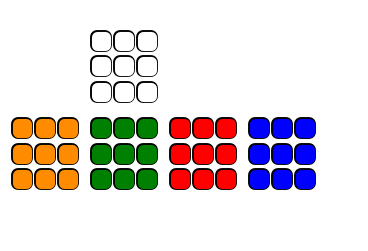

In [34]:
def plot_2d_cube(state,mode=0,colors=["grey","green","r","b","darkorange","w","y"], no_bottom = False):
    '''
    supports cube in mode 0 or 2
    state: cube.state
    mode: if in mode 2, we swap some colors
    colors: list of colors matching [0,1,2,3,4,5,6]
    
    '''
    if mode == 2:
        for i in range(len(state)):
            if state[i]==5:
                state[i]=6
    if no_bottom:
        state = state[:-9]
        
    x_pos = [4,5,6,4,5,6,4,5,6, 8,9,10,8,9,10,8,9,10, 12,13,14,12,13,14,12,13,14, 0,1,2,0,1,2,0,1,2, 4,5,6,4,5,6,4,5,6, 4,5,6,4,5,6,4,5,6][:len(state)]
    y_pos = [6,6,6,5,5,5,4,4,4, 6,6,6,5,5,5,4,4,4, 6,6,6,5,5,5,4,4,4, 6,6,6,5,5,5,4,4,4, 10,10,10,9,9,9,8,8,8, 2,2,2,1,1,1,0,0,0][:len(state)]
    
    for i in range(len(x_pos)):
        x_pos[i] -= 3/5*(x_pos[i]//4)
        y_pos[i] -= 3/5*(y_pos[i]//4)
    
    for i, sticker in enumerate(state):
        plt.scatter(x_pos[i], y_pos[i], c = "k", marker = "s", linewidths=10)
        plt.scatter(x_pos[i], y_pos[i], c = colors[sticker], marker = "s", linewidths=8)
    
    fig = plt.gcf()
    fig.set_size_inches(4, 3)
    if no_bottom:
        fig.set_size_inches(4.5, 3)
        plt.ylim([1,10])
        plt.xlim([-0.5,14.5])
    plt.axis('off')
    plt.show()


# plot_2d_cube([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
#        3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5,
#        5, 6, 6, 6, 6, 6, 6, 6, 6, 6], no_bottom=True)

# plot_2d_cube([0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 3,
#        3, 3, 3, 3, 3, 0, 0, 0, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0,
#        0, 5, 5, 5, 5, 5, 5, 5, 5, 5], mode = 2)


In [2]:
def gen_all_algs(N, cutoff = 1000, include_empty_alg = False, N_min = 0):
    '''
    uses alg_index to gen algs up to length n
    cutoff set high so it doesn't affect anything
    '''
    algs = []
    t = time.time()
    for n in range(N_min, N):
        alg = alg_index(n+1)
        start_alg = alg.get_alg()
        algs.append(start_alg)
        alg.increment()
        while start_alg != alg.get_alg():
            if score_alg(alg.get_alg()) <= cutoff:
                algs.append(alg.get_alg())
            alg.increment()
        print(n+1,"genned in",time.time()-t)
    if include_empty_alg:
        return np.array([""]+algs)
    else:
        return np.array(algs)

def count_moves(alg):
    return len(alg.split(" "))

In [53]:
def gen_random_alg(n):
    if n==0:
        n = random.randint(1,20)
    moves = ["R","R'","R2","L","L'","L2","U","U'","U2","D","D'","D2","F","F'","F2","B","B'","B2"]
    i = random.randint(0,17)
    j = i
    k = -9
    alg = moves[i]
    while n>1:
        i = random.randint(0,17)
        if not (i//3==j//3 or (i//6==j//6 and i//3==k//3)):
            alg += " "+moves[i]
            k = j
            j = i
            n -= 1
    return alg

SyntaxError: invalid syntax (3763628314.py, line 7)

In [ ]:
def gen_random_length(exponent = 2, min_alg_length = 1,max_alg_length = 20):
    r = random.random()
    return int((max_alg_length - min_alg_length+1)*(1 - r**exponent) + min_alg_length)

In [31]:
def cancel_alg(alg):
    ''' 
    cancels algs where each move has 1 character + ' or 2 
    '''
    moves = alg.split(" ")
    original_alg = alg
    alg = ""
    for i in range(len(moves)-1):
        if moves[i] and moves[i][0]==moves[i+1][0]:
            rot = 2
            if moves[i][-1]=="'": rot+=2
            if moves[i][-1]=="2": rot+=1
            if moves[i+1][-1]=="'": rot+=2
            if moves[i+1][-1]=="2": rot+=1
            rot %= 4
            extra = ""

            if rot:

                if rot==2:
                    extra = "2"
                if rot==3:
                    extra = "'"
                    
                moves[i+1] = moves[i][0]+extra

            else: # if cancels fully
                moves[i+1] = ""
        elif moves[i]:
            alg += moves[i] + " "
    
    if moves[-1]:
        alg += moves[-1]
    alg = alg.strip()

    if alg == original_alg:
        return alg 
    # if we cancelled moves, we might be able to cancel more if we run again
    return cancel_alg(alg)


cancel_alg("R R'")

1 R
2 R'


''

In [ ]:
rotation_dict = {
    # move: { rotation: rotated_move }
    "R": {"x": "R", "x2": "R", "x'": "R","y": "F","y2": "L","y'": "B","z": "D","z2": "L","z'": "U",},
    "R'": {"x": "R'", "x2": "R'", "x'": "R'","y": "F'","y2": "L'","y'": "B'","z": "D'","z2": "L'","z'": "U'",},
    "R2": {"x": "R2", "x2": "R2", "x'": "R2","y": "F2","y2": "L2","y'": "B2","z": "D2","z2": "L2","z'": "U2",},
    "L": {"x": "L", "x2": "L", "x'": "L","y": "B","y2": "R","y'": "F","z": "U","z2": "R","z'": "D",},
    "L'": {"x": "L'", "x2": "L'", "x'": "L'","y": "B'","y2": "R'","y'": "F'","z": "U'","z2": "R'","z'": "D'",},
    "L2": {"x": "L2", "x2": "L2", "x'": "L2","y": "B2","y2": "R2","y'": "F2","z": "U2","z2": "R2","z'": "D2",},
    "U": {"x": "B", "x2": "D", "x'": "F","y": "U","y2": "U","y'": "U","z": "R","z2": "D","z'": "L",},
    "U'": {"x": "B'", "x2": "D'", "x'": "F'","y": "U'","y2": "U'","y'": "U'","z": "R'","z2": "D'","z'": "L'",},
    "U2": {"x": "B2", "x2": "D2", "x'": "F2","y": "U2","y2": "U2","y'": "U2","z": "R2","z2": "D2","z'": "L2",},
    "D": {"x": "F", "x2": "U", "B'": "D","y": "D","y2": "D","y'": "D","z": "L","z2": "U","z'": "R",},
    "D'": {"x": "F'", "x2": "U'", "x'": "B'","y": "D'","y2": "D'","y'": "D'","z": "L'","z2": "U'","z'": "R'",},
    "D2": {"x": "F2", "x2": "U2", "x'": "B2","y": "D2","y2": "D2","y'": "D2","z": "L2","z2": "U2","z'": "R2",},
    "F": {"x": "U", "x2": "B", "x'": "D","y": "L","y2": "B","y'": "R","z": "F","z2": "F","z'": "F",},
    "F'": {"x": "U'", "x2": "B'", "x'": "D'","y": "L'","y2": "B'","y'": "R'","z": "F'","z2": "F'","z'": "F'",},
    "F2": {"x": "U2", "x2": "B2", "x'": "D2","y": "L2","y2": "B2","y'": "R2","z": "F2","z2": "F2","z'": "F2",},
    "B": {"x": "D", "x2": "F", "x'": "U","y": "R","y2": "F","y'": "L","z": "B","z2": "B","z'": "B",},
    "B'": {"x": "D'", "x2": "F'", "x'": "U'","y": "R'","y2": "F'","y'": "L'","z": "B'","z2": "B'","z'": "B'",},
    "B2": {"x": "D2", "x2": "F2", "x'": "U2","y": "R2","y2": "F2","y'": "L2","z": "B2","z2": "B2","z'": "B2",},
}

def rotate_alg(alg, rotation):
    # takes an alg and a rotation and returns the alg rotated
    # rotation is a string in the form "x", "x2", "x'"
    # alg is a string in the form "R U R' U'"
    # returns a string in the form "R U R' U'"

    if not rotation:
        return alg

    # split alg into a list of moves
    alg_list = alg.split(" ")

    # rotate each move in the alg
    for i in range(len(alg_list)):
        alg_list[i] = rotation_dict[alg_list[i]][rotation]

    # join the list back into a string
    alg = " ".join(alg_list)

    return alg

# rotate_alg("R U R' U'", "x'")

In [7]:
'''
We want to score each solve according to the amount of regrips. 
Assuming we start in home grip, how many regrips does each solution have?

Grips:
a: homegrip
a-: R' from homegrip
a+: R from homegrip
b: R2 from homegrip
b-: R2' from homegrip
c: R' U from homegrip

'''

new_grip = {
    "a": {
        "R": "a+",
        "R2": "b",
        "R'": "a-",
        "U": "a",
        "U2": "a",
        "U'": "a",
        "F": "0",
        "F2": "0",
        "F'": "a",
    },
    "a-": {
        "R": "a",
        "R2": "a+",
        "R'": "b-",
        "U": "c",
        "U2": "a-",
        "U'": "a-",
        "F": "a-",
        "F2": "a-",
        "F'": "a-",
    },
    "a+": {
        "R": "b",
        "R2": "a-",
        "R'": "a",
        "U": "a+",
        "U2": "a+",
        "U'": "a+",
        "F": "0",
        "F2": "a+",
        "F'": "a+",
    },
    "b": {
        "R": "0",
        "R2": "a",
        "R'": "a+",
        "U": "b",
        "U2": "b",
        "U'": "b",
        "F": "0",
        "F2": "0",
        "F'": "0",
    },
    "b-": {
        "R": "a-",
        "R2": "a",
        "R'": "0",
        "U": "b-",
        "U2": "b-",
        "U'": "b-",
        "F": "0",
        "F2": "0",
        "F'": "0",
    },
    "c": {
        "R": "a",
        "R2": "a+",
        "R'": "0",
        "U": "0",
        "U2": "0",
        "U'": "a-",
        "F": "0",
        "F2": "0",
        "F'": "0",
    },
}

def regrip_count_RUF(solution, current_grip = False):
    
    if current_grip:
        regrips = 0
        solution_split = solution.split(" ")
        for move in solution_split:
            current_grip = new_grip[current_grip][move]
            if current_grip == "0":
                current_grip = "a"
                regrips += 1
        return regrips, current_grip
    else:
        # no grip given, so we test every grip and return the lowest regrip count + the grip
        best_regrips = 100
        best_grip = ""
        for grip in new_grip:
            regrips, _ = regrip_count_RUF(solution, grip)
            if regrips < best_regrips:
                best_regrips = regrips
                best_grip = grip
        return best_regrips, best_grip
    

regrip_count_RUF("R U R' U R U2 R'")

(0, 'a')

a
a-
a+
b
b-
c


In [20]:
move_scores = {
    "R": 1,
    "R'": 1,
    "R2": 2,
    "L": 2,
    "L'": 2,
    "L2": 3,
    "U": 1,
    "U'": 1,
    "U2": 2,
    "D": 1,
    "D'": 1,
    "D2": 2,
    "F": 2,
    "F'": 2,
    "F2": 3,
    "B": 4,
    "B'": 4,
    "B2": 6,
    "M": 2,
    "M'": 1,
    "M2": 3,
    "E": 5,
    "E'": 5,
    "E2": 10,
    "S": 2,
    "S'": 3,
    "S2": 6,
}

def new_score_alg(alg):
    score = 0
    alg_list = alg.split(" ")

    for move in alg_list:
        score += move_scores[move]

    return score/len(alg_list)*np.sqrt(len(alg_list))

# test_algs = ["R' U R' D2 R U' R' D2 R2", "R2 D2 R U R' D2 R U' R", "M2 U M U2 M' U M2", "M2 U' M' U2 M U' M2", "R U R' F' R U R' U' R' F R2 U' R'", "R' U L' U2 R U' R' U2 R L", "M2 U' M2 U2 M2 U' M2", "R U R' U' R' F R2 U' R' U' R U R' F'", "R' U2 R' D' R U' R' D R U R U' R' U' R", "R U' R' U' R U R D R' U' R D' R' U2 R'"]

# # sort test_algs by new_score_alg

# sorted_test_algs = sorted(test_algs, key = score_alg)
# sorted_test_algs


In [ ]:
print("Support algs imported!")